Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **24. listopada 2021. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od četiri zadatka, te tri dodatna zadatka koji se **ne boduju**. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

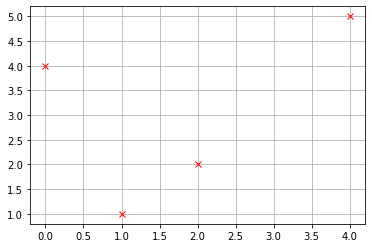

In [6]:
plot(X, y, 'rx')
plt.grid()

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(1)
design_matrix = poly.fit_transform(X)

In [8]:
print(design_matrix)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [9]:
from numpy import linalg

transposed = np.transpose(design_matrix)
inverse = linalg.inv(np.dot(transposed, design_matrix))
pseudoinverse = np.dot(inverse, transposed)
features = np.dot(pseudoinverse, y)
print(features)

[2.2        0.45714286]


In [10]:
pseudoinverse_2 = linalg.pinv(design_matrix)
features_2 = np.dot(pseudoinverse_2, y)
print(features_2)

[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [11]:
from sklearn.metrics import mean_squared_error

features_transposed = np.transpose(features) 
h = [np.dot(features_transposed, row) for row in design_matrix]

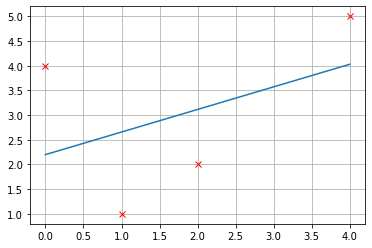

In [19]:
plot(X, y, 'xr')
plot(X, h)
plt.grid()

In [20]:
error = mean_squared_error(y, h)
print(error)

2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [21]:
try_inv = linalg.inv(design_matrix)

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [22]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X,y)
print(linear_regression.coef_)
print(linear_regression.intercept_)

[0.45714286]
2.2


In [23]:
predicted = linear_regression.predict(X)
error2 = mean_squared_error(y, predicted)
print(error2)

2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [24]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    y = []
    for x in X:
        y.append(f(x[0])+normal(0,noise))
    return y

In [25]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [26]:
def f(x):
    return 5 + x - 2*pow(x,2) - 5*pow(x,3)

In [27]:
instances = make_instances(-5,5,50)

In [28]:
labels = make_labels(instances, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

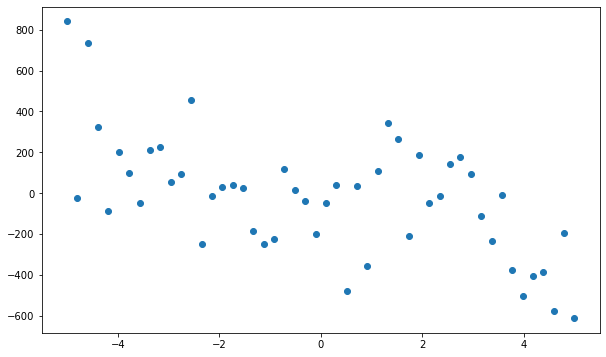

In [37]:
plt.figure(figsize=(10,6))
scatter(instances, labels)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [34]:
poly_reg = PolynomialFeatures(3).fit_transform(instances)
psinv = linalg.pinv(poly_reg)
feat = np.dot(psinv, labels)
h = [np.dot(np.transpose(feat), row) for row in poly_reg]
print(mean_squared_error(h, labels))

41850.25287351768


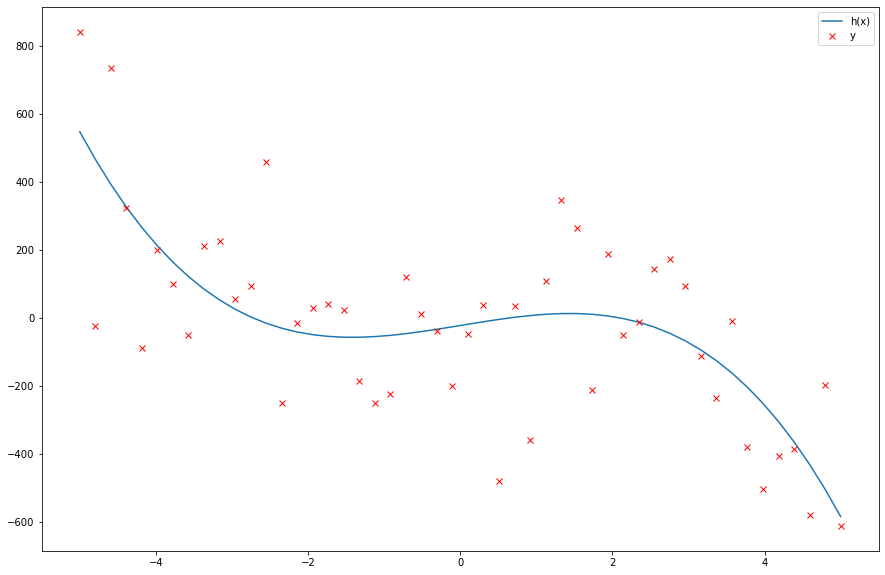

In [44]:
plt.figure(figsize=(15,10))
plot(instances, h, label='h(x)')
plot(instances, labels, 'rx', label='y')
plt.legend()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

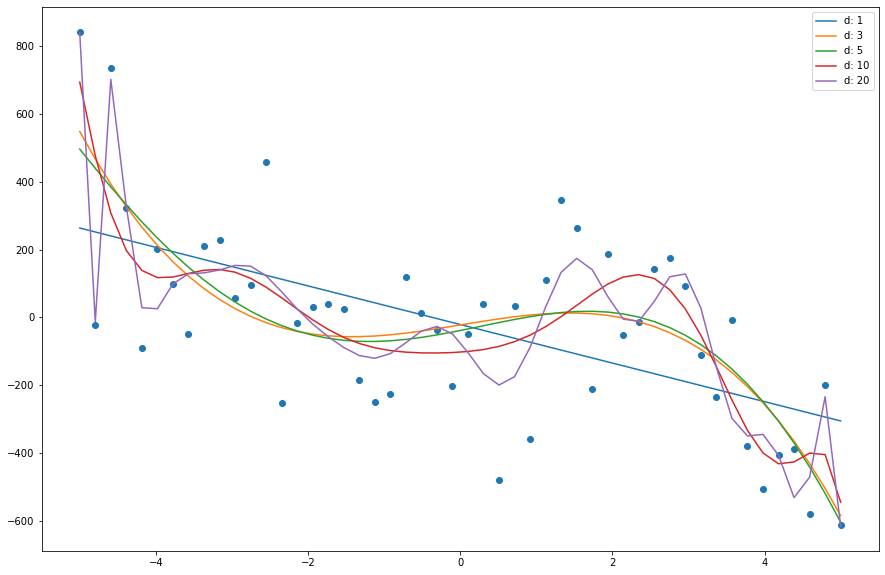

In [46]:
dimensions = [1,3,5,10,20]
colors = ['m', 'g', 'b', 'r', 'y']
models = []

obj = zip(dimensions, colors)

plt.figure(figsize=(15,10))
scatter(instances, labels)

for d, c in obj:
    poly = PolynomialFeatures(d).fit_transform(instances)
    reg = LinearRegression().fit(poly, labels)
    pred = (reg.predict(poly))
    models.append(pred)
    label = 'd: ' + str(d)
    plot(instances, pred, label=label)
    plt.legend()

In [47]:
for h in models:
    print(mean_squared_error(h, labels))

56282.962839979074
41850.25287351768
41594.838801669415
34738.145160822125
21493.498827707688


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5)

In [49]:
err_train = [] 
err_test = []
for i in range(1,21):
    poly_train = PolynomialFeatures(i).fit_transform(X_train)
    poly_test = PolynomialFeatures(i).fit_transform(X_test)
    
    reg = LinearRegression().fit(poly_train, y_train)
    
    err_test.append(mean_squared_error(y_test, reg.predict(poly_test)))
    err_train.append(mean_squared_error(y_train, reg.predict(poly_train)))

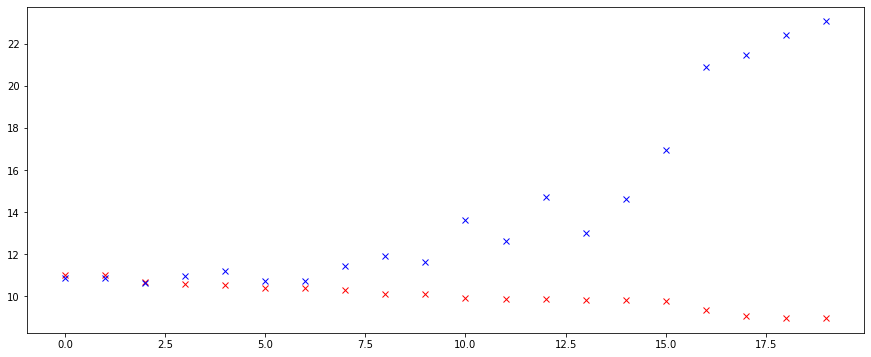

In [69]:
plt.figure(figsize=(15,6))
for i in range(len(err_train)):
    plot(i, math.log(err_train[i]), 'xr')
    plot(i, math.log(err_test[i]), 'xb')

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

In [70]:
instances = make_instances(-5, 5, 1000)
labels = []
train_test_data = []

for sigma in [100, 200, 500]:
    labels.append(make_labels(instances, f, sigma))
    
for label in labels:
    X_train, X_test, y_train, y_test = train_test_split(instances, label, test_size=0.5)
    train_test_data.append([X_train, X_test, y_train, y_test])

In [71]:
from math import ceil

sample_sizes = [ceil(1/3*500), ceil(2/3*500), 500]
print(sample_sizes)

[167, 334, 500]


In [72]:
sampled_data = []
for data in train_test_data:
    X_train, X_test, y_train, y_test = data
    for sample_size in sample_sizes:
        sampled_X_train, sampled_X_test, sampled_y_train, sampled_y_test = X_train[:sample_size], X_test[:sample_size], y_train[:sample_size], y_test[:sample_size]
        sampled_data.append([sampled_X_train, sampled_X_test, sampled_y_train, sampled_y_test])    

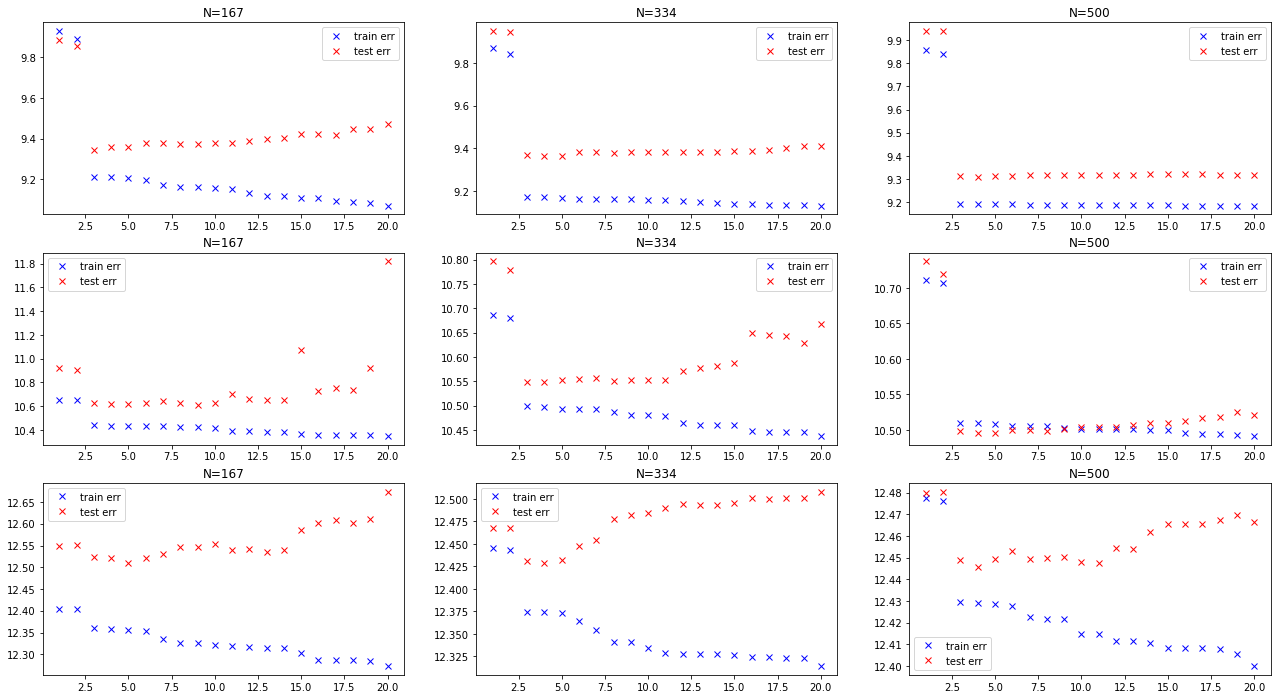

In [75]:
plt.figure(figsize=(22,12))
for index, data in enumerate(sampled_data):
    X_train, X_test, y_train, y_test = data
    err_train = []
    err_test = []
    for d in range(1, 21):
        poly_train = PolynomialFeatures(d).fit_transform(X_train)
        poly_test = PolynomialFeatures(d).fit_transform(X_test)
        
        reg = LinearRegression().fit(poly_train, y_train)
        
        err_train.append(mean_squared_error(y_train, reg.predict(poly_train)))
        err_test.append(mean_squared_error(y_test, reg.predict(poly_test)))
    plt.subplot(3, 3, index+1)
    plt.title(f"N={len(X_train)}")
    plt.plot(range(1, 21), [math.log(mse) for mse in err_train], 'xb', label='train err')
    plt.plot(range(1, 21), [math.log(mse) for mse in err_test], 'xr', label='test err')
    plt.legend()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [76]:
reg_factors = [0,1,10]
poly_feat = PolynomialFeatures(3).fit_transform(X)
unit = np.identity(4)
unit[0][0] = 0
for factor in reg_factors:
    transposed = np.transpose(poly_feat)
    inv = linalg.inv(np.dot(transposed, poly_feat)+ factor*unit)
    print(np.dot(np.dot(inv, transposed),y))

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [77]:
from sklearn.linear_model import Ridge
models = []
for factor in reg_factors:
    ridge = Ridge(alpha=factor)
    res = ridge.fit(poly_feat, y)
    print(res.intercept_, res.coef_)

4.000000000000021 [ 0.         -5.91666667  3.375      -0.45833333]
3.0569614512471652 [ 0.         -0.69079365 -0.2831746   0.1445805 ]
2.4944418431229725 [ 0.         -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

In [78]:
instances = make_instances(-5,5,50)
labels = make_labels(instances, f, 200)
params = [(l, d) for l in [0,100] for d in [2,10]]

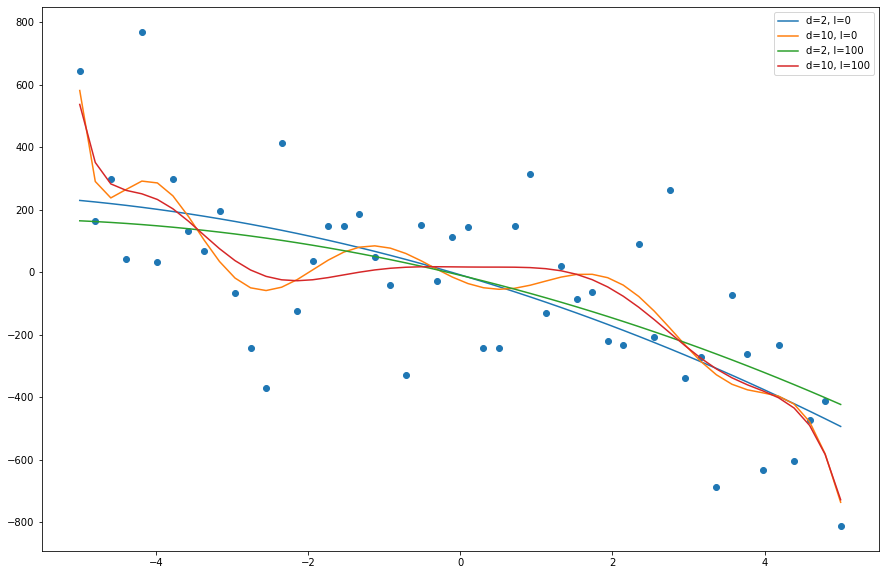

In [79]:
figure(figsize=(15,10))
scatter(instances, labels)
for l, d in params:
    matrix = PolynomialFeatures(d).fit_transform(instances)
    ridge = Ridge(l).fit(matrix, labels)
    plot(instances, ridge.predict(matrix), label=f"d={d}, l={l}")
    plt.legend()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


In [80]:
X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5)
err_train = []
err_test = []

In [81]:
for i in range(51):
    mat_train = PolynomialFeatures(10).fit_transform(X_train)
    mat_test = PolynomialFeatures(10).fit_transform(X_test)
    r = Ridge(i).fit(mat_train, y_train)
    err_train.append(mean_squared_error(y_train, r.predict(mat_train)))
    err_test.append(mean_squared_error(y_test, r.predict(mat_test)))

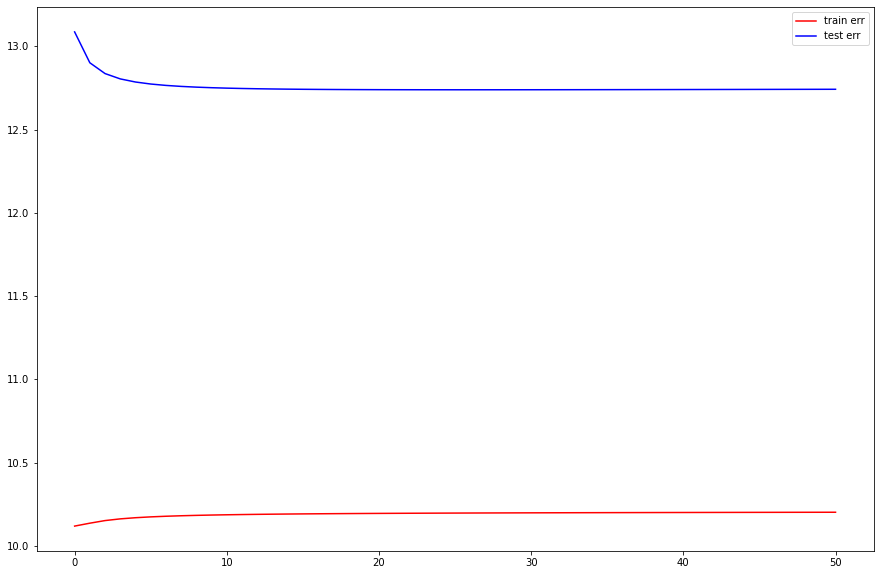

In [83]:
plt.figure(figsize=(15,10))
plot(range(51), np.log(err_train), 'r', label='train err')
plot(range(51), np.log(err_test), 'b', label='test err')
plt.legend()

## Dodatni zadatci

Zadatci u nastavku (označeni zvjezdicom) nisu dio obaveznog dijela laboratorijske vježbe, niti nose bonus bodove. Dakle, nije ih potrebno riješiti kako biste ostvarili 100% bodova na ovoj laboratorijskoj vježbi. Međutim, preporučamo vam da ih pokušate riješiti i na terminu predaje prodiskutirate svoja rješenja s asistentima.

### *5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [84]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [90]:
from sklearn.linear_model import Ridge
instances = make_instances(-5,5,50)
labels = make_labels(instances, f, 200)
X_train, X_test, y_train, y_test = train_test_split(instances, labels, test_size=0.5)

In [91]:
L0 = []
L1 = []
L2 = []
mat = PolynomialFeatures(5).fit_transform(X_train)
for i in range(1, 101):
    ridge = Ridge(i).fit(mat, y_train)
    feat = ridge.coef_
    L0.append(nonzeroes(feat))
    L1.append(linalg.norm(feat, 1))
    L2.append(linalg.norm(feat, 2))

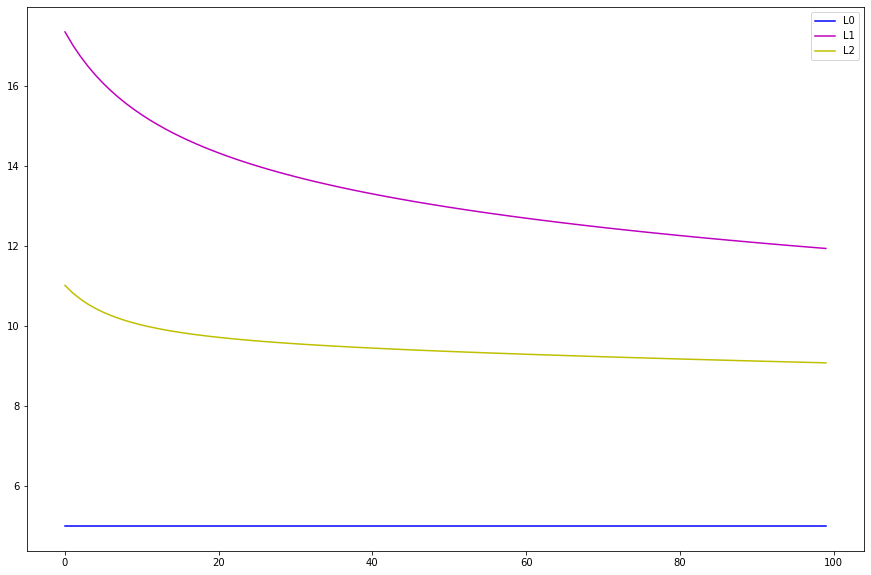

In [92]:
plt.figure(figsize=(15,10))
plot(range(100), L0, 'b', label='L0')
plot(range(100), L1, 'm', label='L1')
plot(range(100), L2, 'y', label='L2')
plt.legend()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [97]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso
L0 = []
L1 = []
L2 = []
mat = PolynomialFeatures(5).fit_transform(X_train)
for i in range(1, 101):
    lasso = Lasso(i).fit(mat, y_train)
    feat = lasso.coef_
    L0.append(nonzeroes(feat))
    L1.append(linalg.norm(feat, 1))
    L2.append(linalg.norm(feat, 2))

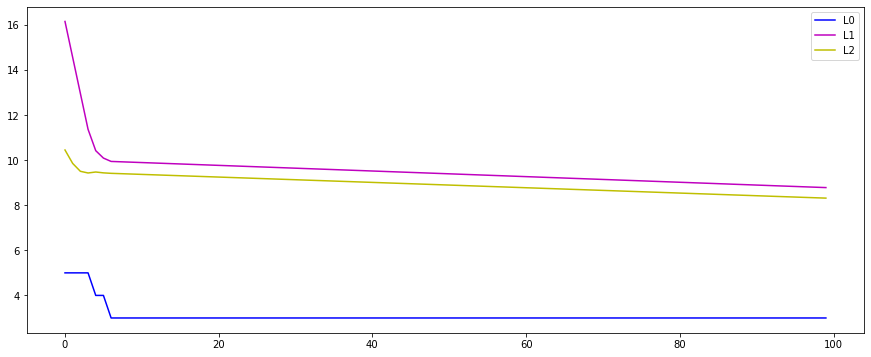

In [98]:
plt.figure(figsize=(15,6))
plot(range(100), L0, 'b', label='L0')
plot(range(100), L1, 'm', label='L1')
plot(range(100), L2, 'y', label='L2')
plt.legend()

### *6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [99]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

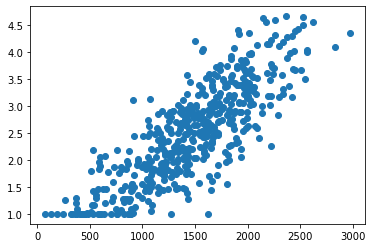

In [100]:
scatter(exam_score, grades_y)

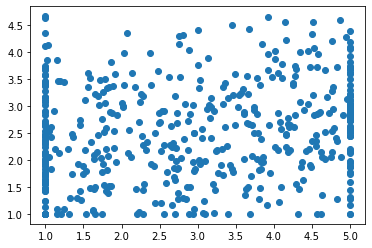

In [101]:
scatter(grade_in_highschool, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [102]:
ridge = Ridge(0.01).fit(grades_X, grades_y)
print(ridge.coef_)

[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [103]:
from sklearn.preprocessing import StandardScaler
grades_X_fixed = StandardScaler().fit_transform(grades_X)
grades_y_fixed = StandardScaler().fit_transform(np.reshape(grades_y, (len(grades_y), 1)))

In [104]:
ridge = Ridge(0.01).fit(grades_X_fixed, grades_y_fixed)
print(ridge.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### *7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [105]:
grades_X_fixed_colinear = np.hstack((grades_X_fixed, np.array([grades_X_fixed.T[-1]]).transpose()))

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [106]:
ridge = Ridge(0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
print(ridge.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [107]:
res1 = []
res2 = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5, shuffle=True)
    ridge = Ridge(0.01).fit(X_train, y_train)
    res1.append(ridge.coef_)
    print(ridge.coef_)
    ridge = Ridge(1000).fit(X_train, y_train)
    res2.append(ridge.coef_)
    print(ridge.coef_)
    print("\n")

[[0.79385128 0.06504303 0.06504303]]
[[0.16436364 0.03812874 0.03812874]]


[[0.80739011 0.0761075  0.0761075 ]]
[[0.15992321 0.02415424 0.02415424]]


[[0.814158   0.07673386 0.07673386]]
[[0.16128257 0.02717137 0.02717137]]


[[0.83265053 0.07483515 0.07483515]]
[[0.16579999 0.03405283 0.03405283]]


[[0.79735626 0.08013669 0.08013669]]
[[0.15703356 0.02664742 0.02664742]]


[[0.81845427 0.04525193 0.04525193]]
[[0.17833349 0.03188297 0.03188297]]


[[0.80086373 0.0614553  0.0614553 ]]
[[0.15563723 0.022474   0.022474  ]]


[[0.81216485 0.06648337 0.06648337]]
[[0.16174675 0.03077003 0.03077003]]


[[0.81501911 0.04444567 0.04444567]]
[[0.16591703 0.01772788 0.01772788]]


[[0.81925961 0.07443972 0.07443972]]
[[0.16617211 0.03087282 0.03087282]]




In [108]:
def stdev(feats):
    dev1 = []
    dev2 = []
    dev3 = []
    for w in feats:
        dev1.append(w[0][0])
        dev2.append(w[0][1])
        dev3.append(w[0][2])
    print(np.std(dev1))
    print(np.std(dev2))    
    print(np.std(dev3))
    print("\n") 

In [109]:
stdev(res1)
stdev(res2)

0.011026717248037256
0.012169449475302642
0.012169449475461518


0.0060276580050807466
0.005675240020786059
0.005675240020786065




**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.